In [99]:
from sentence_transformers import SentenceTransformer, util
from documentizer.pdf import extract_chunks, get_text
import torch
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Detect Natural Breaks in Semantic Similarity
By looking at cosine similarity of sliding window

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [18]:
chunks = get_text(r'documents\1706.03762.pdf')

In [101]:
CHUNK_SIZE = 256
CHUNK_STEP = 20
TOTAL_STEPS = len(chunks)//CHUNK_STEP - CHUNK_SIZE

In [102]:
embeddings = []
for step in range(1, TOTAL_STEPS):
    embedding = model.encode(chunks[(step*CHUNK_STEP):(step*CHUNK_STEP + CHUNK_SIZE)])
    embeddings.append(embedding)
df = pd.DataFrame(embeddings)


In [105]:
similarity = [0]
for i in range(0, len(df) - 1):
    sim = util.cos_sim(df.iloc[i], df.iloc[i+1])
    similarity.append(sim.item())
df['Similarity Neighbor'] = similarity

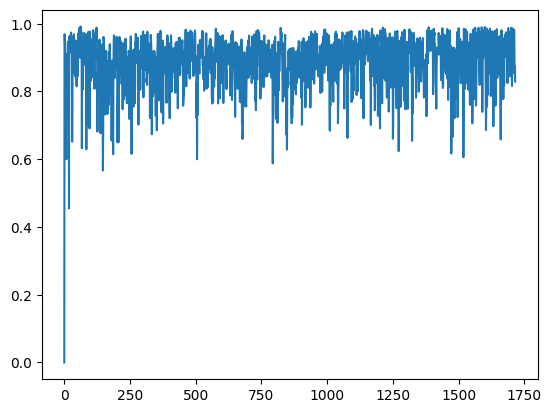

In [106]:
plt.plot(df.index, df['Similarity Neighbor'])